In [203]:
import matplotlib.pyplot as plt
import numpy as np

In [204]:
def TP(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 1, y_gt == 1))

def FP(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 0, y_gt == 1))

def FN(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 1, y_gt == 0))

def TN(y_pred: np.array, y_gt: np.array):
    return np.count_nonzero(np.logical_and(y_pred == 0, y_gt == 0))

def precision(y_pred: np.array, y_gt: np.array):
    TruePositive = TP(y_pred, y_gt)
    FalsePositive = FP(y_pred, y_gt)
    return TruePositive / (TruePositive + FalsePositive)

def recall(y_pred: np.array, y_gt: np.array):
    TruePositive = TP(y_pred, y_gt)
    FalseNegative = FN(y_pred, y_gt)
    return TruePositive / (TruePositive + FalseNegative)

def F1(y_pred: np.array, y_gt: np.array):
    PR = precision(y_pred, y_gt)
    REC = recall(y_pred, y_gt)
    return 2 * PR * REC / (PR + REC)

def TPR(y_pred: np.array, y_gt: np.array):
    return recall(y_pred, y_gt)

def FPR(y_pred: np.array, y_gt: np.array):
    FalsePositive = FP(y_pred, y_gt)
    TrueNegative = TN(y_pred, y_gt)
    return FalsePositive / (FalsePositive + TrueNegative)

In [205]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

number_of_samples = 500
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_classes=2, n_samples=number_of_samples)
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size = X.shape)
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

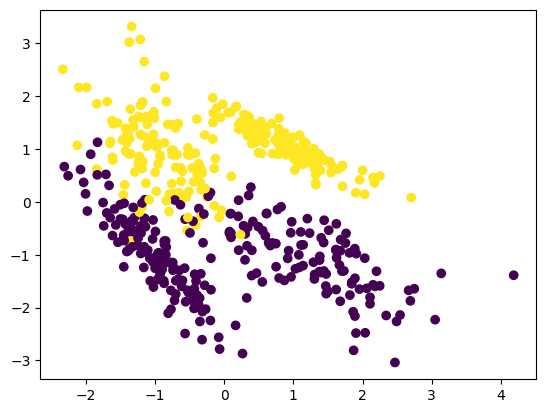

In [206]:
plt.rcParams['figure.dpi'] = 100
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [KNeighborsClassifier(10), LogisticRegression()]

In [208]:
def PR_curve(pred, gt):
    rec = np.zeros_like(pred)
    prec = np.zeros_like(pred)
    for i, threshold in enumerate(sorted(pred.copy())):
        y_predict = pred >= threshold
        rec[i] = recall(y_predict, gt)
        prec[i] = precision(y_predict, gt)
    return np.concatenate([[.0], rec]), np.concatenate([[1.],prec])

In [209]:
def ROC_curve(pred, gt):
    fpr = np.zeros_like(pred)
    tpr = np.zeros_like(pred)
    for i, threshold in enumerate(sorted(pred.copy())):
        try:
            y_predict = pred >= threshold
            fpr[i] = FPR(y_predict, gt)
            tpr[i] = TPR(y_predict, gt)
        except ZeroDivisionError:
            continue
    return np.concatenate([[0.], fpr, [1.]]), np.concatenate([[0.], tpr, [1.]])

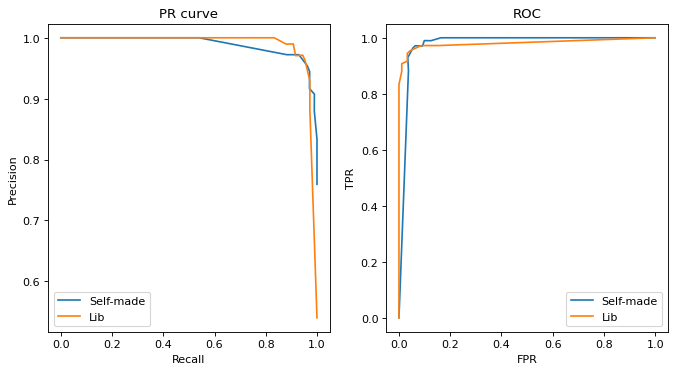

PR AUC = 0.9891557996851914
ROC AUC = 0.9767498427318347
Lib PR AUC = 0.9891557996851914
Lib ROC AUC = 0.9807769726247987


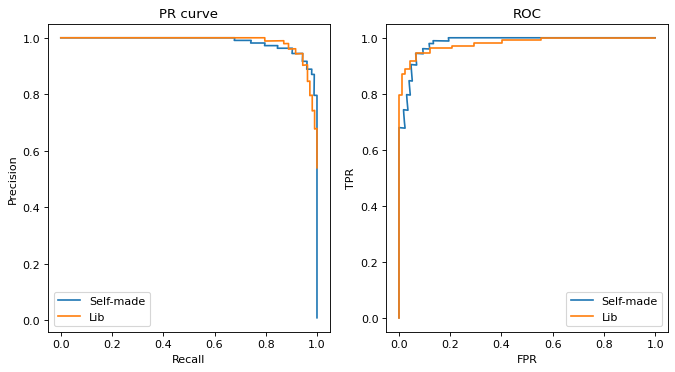

PR AUC = 0.985678681651839
ROC AUC = 0.9821078328172023
Lib PR AUC = 0.9856786816518391
Lib ROC AUC = 0.980072463768116


In [210]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve

for classifier in classifiers:
    plt.figure(figsize=(10, 5), dpi=80)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict_proba(X_test)[:, 1]
    Recall, Precision = PR_curve(predictions, y_test)
    fpr, tpr = ROC_curve(predictions, y_test)

    lib_prs, lib_rec, _ = precision_recall_curve(y_test, predictions)
    lib_pr_auc = auc(lib_rec, lib_prs)
    lib_fpr, lib_tpr, _ = roc_curve(y_test, predictions)
    lib_roc_auc = auc(lib_fpr, lib_tpr)

    plt.subplot(121)
    plt.title('PR curve')
    plt.plot(Recall, Precision, label='Self-made')
    plt.plot(lib_rec, lib_prs, label='Lib')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.subplot(122)
    plt.title('ROC')
    plt.plot(fpr, tpr, label='Self-made')
    plt.plot(lib_fpr, lib_tpr, label='Lib')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()
    print('PR AUC = ' + str(np.trapz(Precision, Recall)))
    print('ROC AUC = ' + str(np.trapz(tpr, fpr)))
    print('Lib PR AUC = ' + str(lib_pr_auc))
    print('Lib ROC AUC = ' + str(lib_roc_auc))